## **I. Introduction**

This project aims to analyze layoff data with focus on technology companies from around the world between 2020 and 2024, providing insights into employment trends and the factors contributing to workforce reductions. The analysis will encompass different countries, allowing for comparative studies and identification of global patterns in employment instability.

## **II. Objectives**

The objective of this project is to analyze layoff data from around the world between 2020 and 2024 to identify trends and factors that lead to job losses. It will gather data, examine changes over time, and compare different regions to understand the global job market better. Special attention will be given to the U.S. job market to explore how economic conditions and technology impact employment. Ultimately, the project aims to assess how layoffs affect different groups and industries, providing useful insights into today's job market.

## **III. Analytical Questions**


1.   What is the correlation between a location with laid-off rate?
2.   How does the size of a company affect the laid-off rate?




## **IV. Database Analysis**



At first, we will look at the overall dataset from Kaggle. With the help from Python, it is much easier to understand and filter important figures. This dataset concludes of analytical data as:


*   Company names & its headquarter locations
*   Industry
*   Country
*   Total layoffs & layoff percentage





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Read the dataset
layoff = pd.read_csv('/content/layoffs.csv')
layoff.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Kuku FM,Mumbai,Media,80.0,NaN,2024-11-14,Series C,India,71.0
1,AMD,SF Bay Area,Hardware,1000.0,0.04,2024-11-13,Post-IPO,United States,NaN
2,AppLovin,SF Bay Area,Marketing,120.0,NaN,2024-11-13,Post-IPO,United States,1600.0
3,Chegg,SF Bay Area,Education,319.0,0.21,2024-11-12,Post-IPO,United States,227.0
4,Forward,SF Bay Area,Healthcare,200.0,1.00,2024-11-12,Series E,United States,325.0
5,New Relic,SF Bay Area,Infrastructure,NaN,NaN,2024-11-12,Acquired,United States,214.0
6,Stoa,Bengaluru,Education,NaN,1.00,2024-11-12,Seed,India,NaN
7,Enphase Energy,SF Bay Area,Energy,500.0,0.17,2024-11-11,Post-IPO,United States,116.0
8,23andMe,SF Bay Area,Healthcare,200.0,0.40,2024-11-11,Post-IPO,United States,1100.0
9,Sword Health,New York City,Healthcare,13.0,NaN,2024-11-11,Unknown,United States,450.0


In [27]:
# Access the dataset information
layoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3880 non-null   object 
 1   location             3879 non-null   object 
 2   industry             3879 non-null   object 
 3   total_laid_off       2532 non-null   float64
 4   percentage_laid_off  2486 non-null   float64
 5   date                 3880 non-null   object 
 6   stage                3873 non-null   object 
 7   country              3880 non-null   object 
 8   funds_raised         3452 non-null   float64
dtypes: float64(3), object(6)
memory usage: 272.9+ KB


In [28]:
# Adding column ['year'] & delete column ['date'] ['stage']
layoff['year'] = pd.to_datetime(layoff.date).dt.year
del layoff['date']

In [29]:
# Check the overall stages in the dataset
layoff.stage.value_counts()

,count
stage,
Post-IPO,838
Unknown,662
Series B,445
Series C,420
Acquired,346
Series D,331
Series A,255
Series E,179
Seed,124


In [24]:
# Make the dataset easier to read by deleting decimals in total_laid_off & fund_raised
layoff.total_laid_off = layoff.total_laid_off.astype(int)
layoff.funds_raised = layoff.funds_raised.astype(int)

In [5]:
# Check missing data in each column
layoff.isnull().sum()

,0
company,0
location,1
industry,1
total_laid_off,1348
percentage_laid_off,1394
country,0
funds_raised,428
year,0


In [7]:
# Delete rows where has Nan data and Inf data
layoff.replace([np.inf, -np.inf], np.nan, inplace=True)
layoff.dropna(inplace=True)

Since the database does not provide the total employees of a company, the below code will help calculate total employees based on the layoff percentage with the layoff employees.
The new column ['Employee'] will further assist in total industry view of impact.

In [23]:
# Calculate company employees and add 1 column ['Employee']
# Use astype(int) for cleaner figures along with remove function for infinite
layoff['employee'] = (layoff.total_laid_off / layoff.percentage_laid_off).astype(int)

In [22]:
# Look into new ['emmployee'] column
layoff.employee.describe()

,employee
count,1603.000000
mean,3192.671241
std,17331.319063
min,4.000000
25%,213.500000
50%,539.000000
75%,1485.500000
max,400000.000000


### **1. Glance at Global Layoff data**
This section will give a clear picture of job cuts across countries, industries, and companies. By analyzing this data, we can see which countries are most affected, which industries face the largest layoffs, and how major companies are managing their workforce. This helps us understand the economic challenges and trends shaping the global job market.








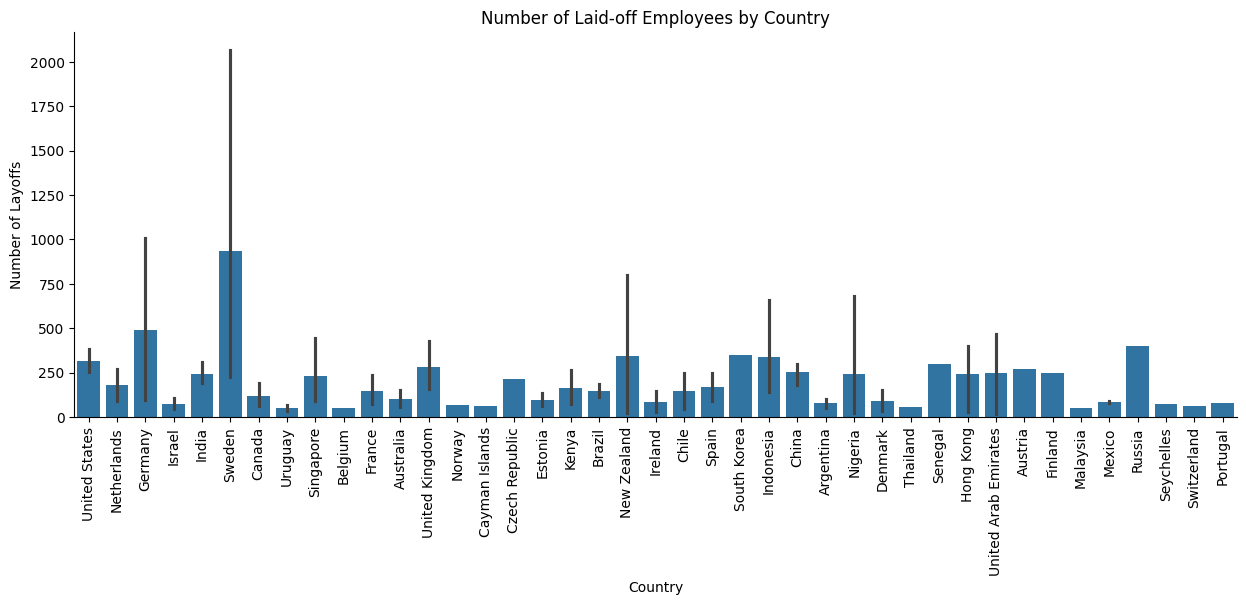

In [12]:
# Visualize each country's layoff data with barplot
plt.figure(figsize = (15,5))

sns.barplot(x= 'country', y= 'total_laid_off', data = layoff)
plt.xlabel('Country')
plt.ylabel('Number of Layoffs')
plt.title('Number of Laid-off Employees by Country')
plt.xticks(rotation = 90)

sns.despine()
plt.show()

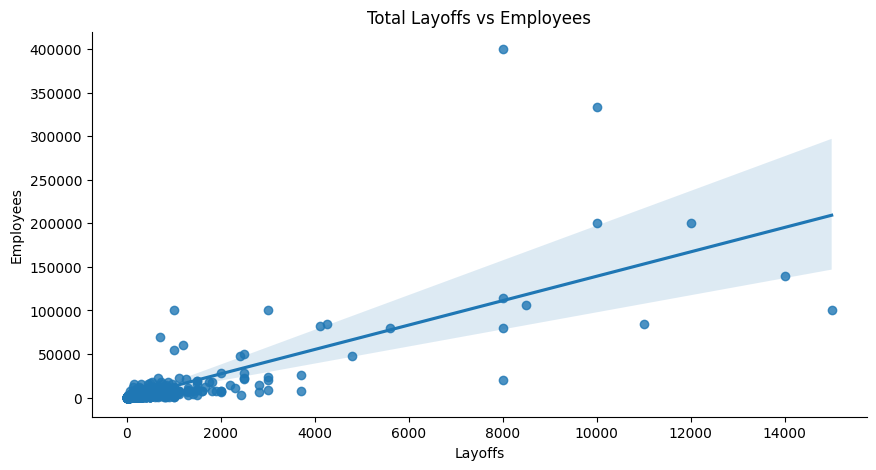

In [10]:
# Scatter diagram to visualize the relationship between laid-off employees vs total employees
plt.figure(figsize = (10,5))

sns.regplot(x = 'total_laid_off', y = 'employee', data = layoff)
plt.title('Total Layoffs vs Employees')
plt.xlabel('Layoffs')
plt.ylabel('Employees')

sns.despine()

This scatter plot shows the relationship between total layoffs and the number of employees in companies. The positive trend indicates that larger companies tend to have more layoffs. However, some companies stand out with high layoffs despite having fewer employees, suggesting unique challenges or strategies.

After looking at overall information of global layoff data, it's time to deep dive into each industry and category to understand about the trend, market status.

In [16]:
# Find top 4 largest layoffs by company and calculate the laid-off rate
company = layoff.groupby('company').agg({
    'total_laid_off': 'sum',
    'employee': 'max',
    'funds_raised': 'sum'
}).sort_values(by='total_laid_off', ascending=False).reset_index()

company['layoff_rate'] = (company.total_laid_off / company.employee).round(2)

company = company.iloc[:4]
company

,company,total_laid_off,employee,funds_raised,layoff_rate
0,Amazon,18000,400000,216,0.04
1,Intel,15000,100000,12,0.15
2,Tesla,14000,140000,20200,0.10
3,Cisco,13950,85000,6,0.16


In [17]:
# Find top 4 largest layoffs by industry and calculate the laid-off rate
industry = layoff.groupby('industry').agg({
    'total_laid_off' : 'sum',
    'employee' : 'sum',
    'funds_raised' : 'sum'
}).sort_values(by='total_laid_off', ascending = False).reset_index()

industry['layoff_rate'] = (industry.total_laid_off / industry.employee).round(2)

industry = industry.iloc[:4]
industry

,industry,total_laid_off,employee,funds_raised,layoff_rate
0,Transportation,50785,426141,289797,0.12
1,Retail,49683,968660,76290,0.05
2,Other,49103,716822,41757,0.07
3,Consumer,45972,429498,99925,0.11


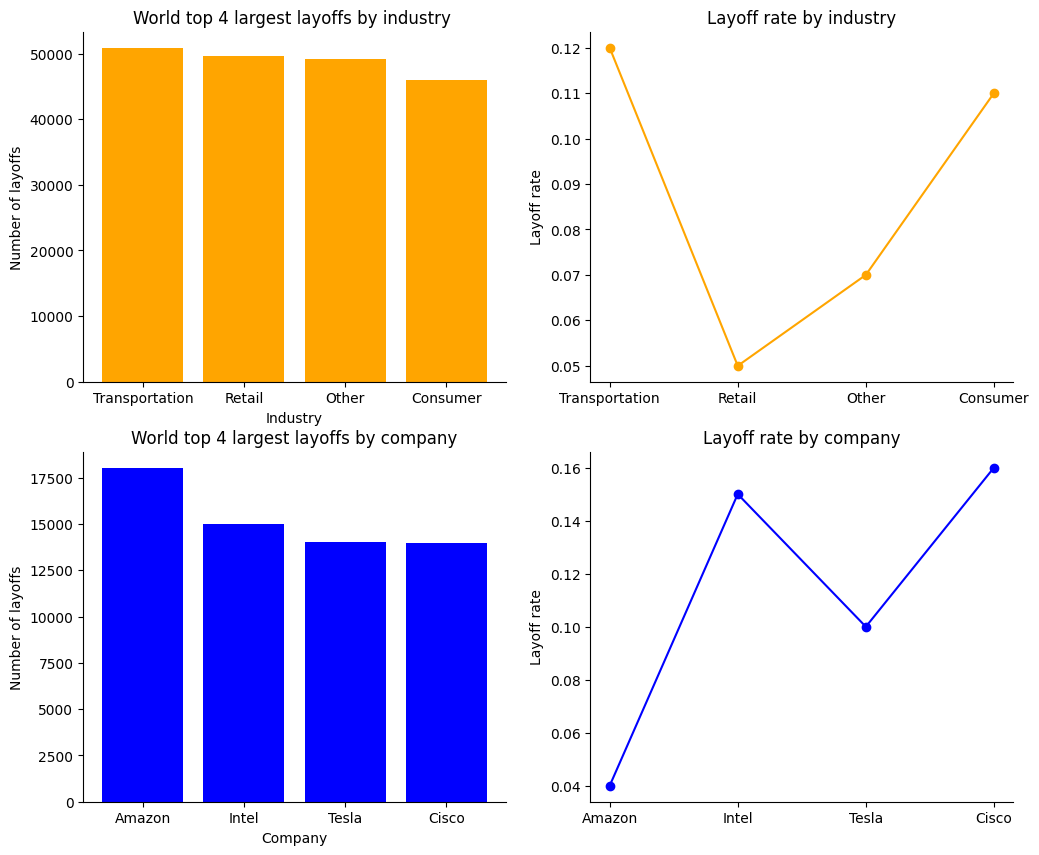

In [18]:
# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize = (12,10))

# The first bar chart for all countries total layoff by industry
axs[0,0].bar(industry.industry, industry.total_laid_off, color = 'orange')
axs[0,0].set_title('World top 4 largest layoffs by industry ')
axs[0,0].set_ylabel('Number of layoffs')
axs[0,0].set_xlabel('Industry')

# The second line plot for world laid off rate
axs[0,1].plot(industry.industry, industry.layoff_rate, marker = 'o', color = 'orange')
axs[0,1].set_title('Layoff rate by industry')
axs[0,1].set_ylabel('Layoff rate')

# The third bar chart for top 4 companies lay off
axs[1,0].bar(company.company, company.total_laid_off, color = 'blue')
axs[1,0].set_title('World top 4 largest layoffs by company')
axs[1,0].set_ylabel('Number of layoffs')
axs[1,0].set_xlabel('Company')

# The fourth line plot for top 4 companies laid off rate
axs[1,1].plot(company.company, company.layoff_rate, marker = 'o', color = 'blue')
axs[1,1].set_title('Layoff rate by company')
axs[1,1].set_ylabel('Layoff rate')

sns.despine()
plt.show()

Deep dive into most affected industries by the lay-off wave, Transportation
ranks first at having the most layoffs with around 50000 impacted employees. However, the top-right chart reveals a key insight: while Retail leads in total layoffs, its layoff rate is notably lower, suggesting this industry's workforce is larger and less severely impacted.

This insight also aligns with one in the company-level charts that Retail industry - Amazon has the lowest layoff rate among the 4 companies.

On the company level, the bottom-left chart identifies Amazon as the leader in total layoffs, followed by Intel, Tesla, and Cisco. However, the bottom-right chart shows that Cisco and Intel have higher layoff rates, suggesting smaller workforces that faced more aggressive reductions. These insights highlight how layoffs vary significantly by sector and company, with some entities experiencing higher proportional impacts despite having fewer overall layoffs. This analysis can guide deeper exploration into economic pressures affecting specific industries and companies.








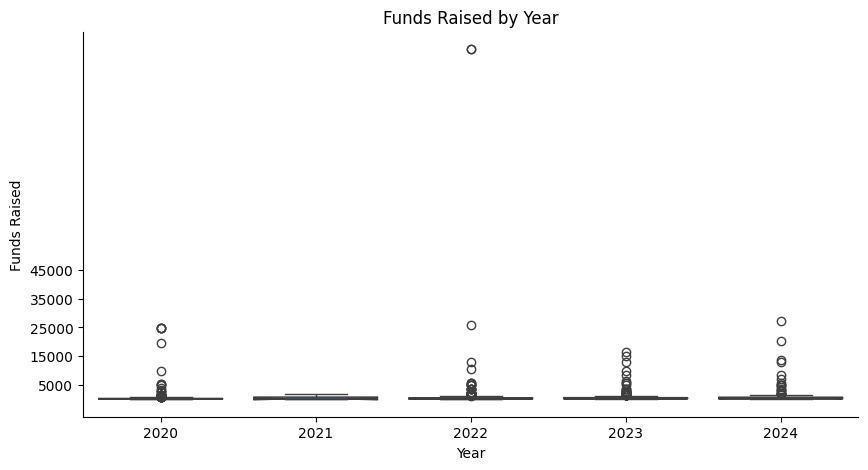

In [25]:
#Box plot visualization for funds raised by years
plt.figure(figsize = (10,5))

sns.boxplot(x = 'year', y = 'funds_raised', data = layoff, notch = True,)

plt.yticks(ticks=range(5000,50000,10000))
plt.xlabel('Year')
plt.ylabel('Funds Raised')
plt.title('Funds Raised by Year')

sns.despine()
plt.show()

In this box plot chart, the highlighting point here is in 2021 - where had the Covid19 pandemic, had barely funds at all. While other years, most companies fund at same range from 5000 to 10000.

### **2. Glance at US Layoff data**
Living in the US, understanding the job market is essential, especially regarding layoffs. In this section, we explore layoff trends from 2020 to 2024, analyzing patterns over time. Additionally, geographical factors such as location should be considered to understand their influence on layoffs, providing a comprehensive view of the dynamics shaping the workforce during this period.




In [20]:
# Extract company in US
us = layoff[layoff['country'] == 'United States']
us.head()

,company,location,industry,total_laid_off,percentage_laid_off,country,funds_raised,year,employee
3,Chegg,SF Bay Area,Education,319,0.21,United States,227,2024,1519
4,Forward,SF Bay Area,Healthcare,200,1.00,United States,325,2024,200
7,Enphase Energy,SF Bay Area,Energy,500,0.17,United States,116,2024,2941
8,23andMe,SF Bay Area,Healthcare,200,0.40,United States,1100,2024,500
10,Monarch Tractor,SF Bay Area,Other,35,0.10,United States,214,2024,350


In [21]:
#Calcute total layoffs by year in the US
us_sum = us.groupby('year').agg(
    total_laid_off = ('total_laid_off', 'sum')
).reset_index()
us_sum

,year,total_laid_off
0,2020,44022
1,2021,6137
2,2022,92668
3,2023,109348
4,2024,80139


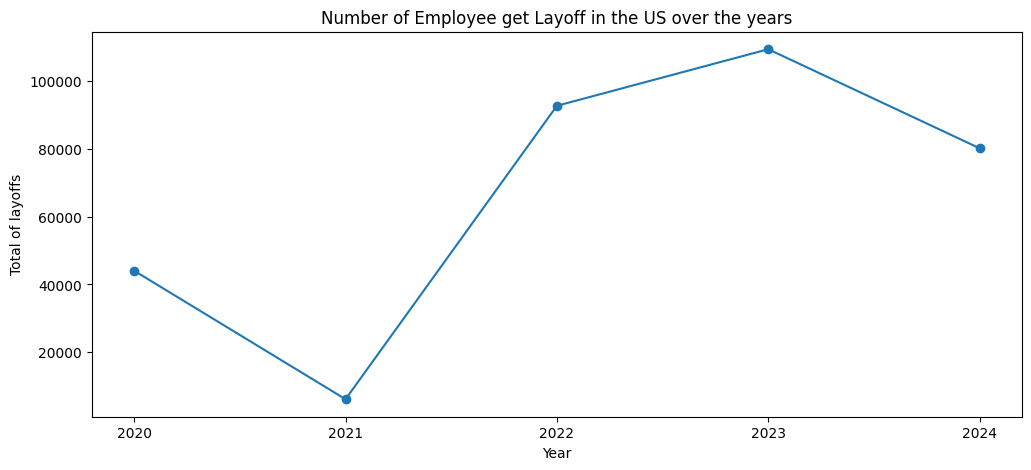

In [ ]:
#Visualization with line plot
plt.figure(figsize = (12,5))

plt.plot(us_sum.year, us_sum.total_laid_off, marker = 'o')

plt.title('Number of Employee get Layoff in the US over the years')
plt.xlabel('Year')
plt.xticks(us_sum['year'], labels=us_sum['year'].astype(int))
plt.ylabel('Total of layoffs')

plt.show()

There was a fluctuation from 40000 layoffs in 2020 to the bottom at around 5000 in 2021. An upward trend was then followed until 2023 to reach its peak at over 100000 employees.

The chart suggests that 2021 was ideally a golden time for firms and corporations without economic recession. Also in other reports, it is stated that employees had more opportunities in finding a job compare to nowadays.

In [ ]:
#Top largest layoffs by US locations
us_location = us.groupby(['location'])['total_laid_off'].sum().sort_values(ascending = False).reset_index()
us_location

,location,total_laid_off
0,SF Bay Area,170690
1,Seattle,37994
2,New York City,27424
3,Austin,18641
4,Boston,14298
...,...,...
62,Missoula,30
63,Nashua,23
64,Santa Fe,12
65,Toronto,5


The below code will filter out top 4 locations that have the most layoff employees over the years. These locations will then be stored in a dictionary, using a for loop to print out the result with percentage contribution.

In [ ]:
# Create a dictionary with top 4 US locations and other locations with numbers of laid-off employees
us_location_dict = {
    'SF Bay Area': 170690,
    'Seattle': 37994,
    'New York': 27424,
    'Austin': 18641,
    'Other locations': (us_location['total_laid_off'].sum() - 170690 - 37994 - 27424 - 18641).astype(int)      #in order to arrange other locations in 1 group for better visualization
}

# Using for loop to see details in each location
total_us_laid_off = us_location['total_laid_off'].sum()

for key, value in us_location_dict.items():
    us_location_dict[key] = round(value / total_us_laid_off * 100, 2)
    print(f'{key}: {value} laid-off employees ({us_location_dict[key]}%)')

SF Bay Area: 170690 laid-off employees (51.36%)
Seattle: 37994 laid-off employees (11.43%)
New York: 27424 laid-off employees (8.25%)
Austin: 18641 laid-off employees (5.61%)
Other locations: 77565 laid-off employees (23.34%)


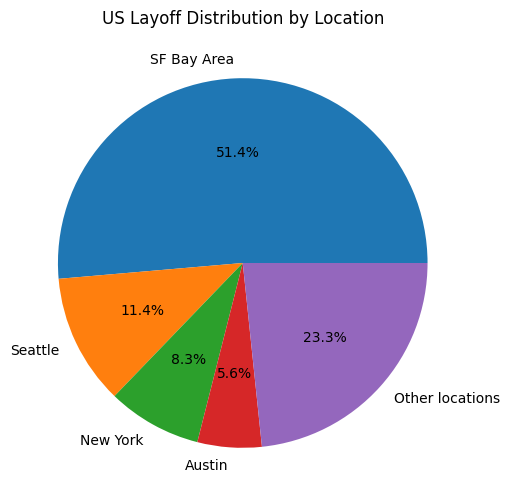

In [ ]:
# Convert the dictionary into a DataFrame
us_location_df = pd.DataFrame(us_location_dict.items(), columns = ['location', 'employee'])

# Create a Pie Chart visualizing US Layoff by location
plt.figure(figsize = (6,6))
plt.pie(us_location_df['employee'], labels = us_location_df['location'], autopct='%1.1f%%')
plt.title('US Layoff Distribution by Location')

plt.show()

The pie chart suggests that more than half of the layoffs coming from the Bay Area, where is known to be the home to technology companies such as Airbnb, Apple, Google, Paypal and many more.

This data suggests that layoffs are heavily concentrated in tech-heavy regions like the Bay Area and Seattle, reflecting the industries and economic pressures specific to these locations.

## **V. Conclusions**
After investigating the layoff data from 2020 - 2024, I have come up with the conclusions for 2 analytical questions. The size of a company does effect to the layoff rate of it. There is a positive trend in the correlation of size and numbers of layoff, indicating that larger companies tend to have more layoffs. Meanwhile, another factor that can also affect the layoff rate is the location of company. Looking into US specific location data, it is obvious that tech-heavy regions like Sillicon Valley, also known as the Bay Area account for more than half of the layoff numbers. These findings emphasize the importance of company size and regional industry concentration in understanding layoff patterns.



## **VI. Reflection**
During the analysis of global and US layoff data, I recognized some important insights. First, the power of visualization is invaluable for making numbers, calculations, and data more understandable and accessible. Effective data visualization simplifies the identification of patterns and accelerates the process of gaining insights, making it an essential tool for presenting and analyzing large, complex datasets. Second, multiple factors influence the layoff rate, with company size and location being two of the most significant. These observations highlight the importance of both analytical tools and contextual factors in understanding layoff trends.



## **VII. Reference**
Layoffs Dataset: Tech layoffs dataset from COVID 2019 to present

From Kaggle: https://www.kaggle.com/datasets/swaptr/layoffs-2022/data

In [31]:
!jupyter nbconvert --to html /content/NgocNguyen_Final_assignment.ipynb

[NbConvertApp] Converting notebook /content/NgocNguyen_Final_assignment.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 763970 bytes to /content/NgocNguyen_Final_assignment.html
